# Import Packages

In [1]:
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import time
import numpy as np

# Download Data

In [2]:
gdp = pd.read_csv("gdp_weights.csv")
state_id = pd.read_csv("https://raw.githubusercontent.com/Opportunitylab/EconomicTracker/main/data/GeoIDs%20-%20State.csv")
low_inc_small_biz_employment = pd.read_csv("https://raw.githubusercontent.com/Opportunitylab/EconomicTracker/main/data/Low%20Inc%20Emp%20Small%20Businesses%20-%20State%20-%20Daily.csv")
small_biz_openings = pd.read_csv("https://raw.githubusercontent.com/Opportunitylab/EconomicTracker/main/data/Womply%20Merchants%20-%20State%20-%20Daily.csv")
job_posting = pd.read_csv("https://raw.githubusercontent.com/Opportunitylab/EconomicTracker/main/data/Burning%20Glass%20-%20State%20-%20Weekly.csv")
low_inc_small_biz_earnings = pd.read_csv("https://raw.githubusercontent.com/Opportunitylab/EconomicTracker/main/data/Low%20Inc%20Earnings%20All%20Businesses%20-%20State%20-%20Daily.csv")
spending_data = pd.read_csv("https://raw.githubusercontent.com/OpportunityInsights/EconomicTracker/main/data/Affinity%20-%20State%20-%20Daily.csv")
smal_biz_revenue =pd.read_csv("https://raw.githubusercontent.com/Opportunitylab/EconomicTracker/main/data/Womply%20Revenue%20-%20State%20-%20Daily.csv")

In [3]:
job_postings = pd.read_csv("https://raw.githubusercontent.com/Opportunitylab/EconomicTracker/main/data/Burning%20Glass%20-%20National%20-%20Weekly.csv")


In [4]:
job_postings["date"] = job_postings['day_endofweek'].map(str) + '-' + job_postings['month'].map(str) + '-' + job_postings['year'].map(str)


In [5]:
job_postings.to_csv("covid_jobs.csv")

In [6]:
spending_data

,year,month,day,statefips,spend_acf,spend_aer,spend_all,spend_apg,spend_grf,spend_hcs,spend_tws,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle
0,2020,1,6,1,.,.,.,.,.,.,.,.,.,.
1,2020,1,6,2,.,.,.,.,.,.,.,.,.,.
2,2020,1,6,4,.,.,.,.,.,.,.,.,.,.
3,2020,1,6,5,.,.,.,.,.,.,.,.,.,.
4,2020,1,6,6,.,.,.,.,.,.,.,.,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10705,2020,8,2,51,-.334,-.479,-.097,-.166,.0821,-.14,-.507,-.129,-.0228,-.0865
10706,2020,8,2,53,-.361,-.377,-.0711,-.106,.141,-.067,-.462,-.0937,-.169,-.0422
10707,2020,8,2,54,-.259,-.496,-.0289,-.0272,.0354,-.00999,-.392,-.00927,-.0214,-.0343
10708,2020,8,2,55,-.345,-.479,-.0564,.00571,.142,-.16,-.499,-.0822,-.0772,-.0502


In [7]:
mobility = pd.read_csv("https://raw.githubusercontent.com/Opportunitylab/EconomicTracker/main/data/Google%20Mobility%20-%20State%20-%20Daily.csv")
fips_code =pd.read_csv("https://gist.githubusercontent.com/dantonnoriega/bf1acd2290e15b91e6710b6fd3be0a53/raw/11d15233327c8080c9646c7e1f23052659db251d/us-state-ansi-fips.csv")    

# Merge Location Data

In [8]:
location = pd.merge(gdp[["State","GDP_Contribution","Region"]],
                  state_id[["statename","stateabbrev"]],
                  left_on = "State",
                  right_on ="statename",
                  how='left')
location = pd.merge(location,
                  fips_code,
                  left_on = "State",
                  right_on ="stname",
                  how='left')

location = location.rename(columns={" st": "FIPS"})



# Define Functions

In [9]:
#change date syntax to a single column
def date_it(day, month, year,dataframe):
    date_1 = day.map(str)
    date_2 = month.map(str)
    date_3 = year.map(str)
    dataframe["date"] = date_1+"-"+date_2+"-"+date_3

# Clean Up Small Biz Data

In [10]:
date_it(smal_biz_revenue['day'],smal_biz_revenue['month'],smal_biz_revenue['year'],smal_biz_revenue)
date_it(small_biz_openings['day'],small_biz_openings['month'],small_biz_openings['year'],small_biz_openings)

In [11]:
#reindex the series
small_biz_data = small_biz_openings[["merchants_all","statefips","date"]].copy()
small_biz_data["merchants_all"]= small_biz_data["merchants_all"]*100 
small_biz_data["merchants_all"]=small_biz_data["merchants_all"]+100

#reindex the series
smal_biz_revenue_data = smal_biz_revenue[["revenue_all","statefips","date"]].copy()
smal_biz_revenue_data["revenue_all"]= smal_biz_revenue_data["revenue_all"]*100
smal_biz_revenue_data["revenue_all"]=smal_biz_revenue_data["revenue_all"]+100

In [12]:
small_biz_combo = pd.merge(small_biz_data,
                  smal_biz_revenue_data,
                  left_on = ["statefips","date"],
                  right_on =["statefips","date"],
                  how='left')

# Clean up Mobility Data

In [13]:
date_it(mobility['day'],mobility['month'],mobility['year'],mobility)

In [14]:
#reindex the series
mobility_data = mobility[["gps_workplaces","statefips","date"]].copy()
mobility_data["gps_workplaces"]= mobility_data["gps_workplaces"]*100 
mobility_data["gps_workplaces"]=mobility_data["gps_workplaces"]+100

mobility_data["retail_rec"] = mobility[["gps_retail_and_recreation"]].copy()
mobility_data["retail_rec"]= mobility_data["retail_rec"]*100 
mobility_data["retail_rec"]=mobility_data["retail_rec"]+100

In [15]:
mobility.head()

,year,month,day,statefips,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_parks,gps_transit_stations,gps_workplaces,gps_residential,gps_away_from_home,date
0,2020,2,24,1,0.00286,-0.00714,.0557,0.06000,0.01290,0.00857,-0.007980,24-2-2020
1,2020,2,24,2,0.03000,0.00714,.0629,0.03140,0.01570,0.00286,-0.000578,24-2-2020
2,2020,2,24,4,0.03140,0.00714,.0543,0.04000,0.00286,0.00429,-0.007510,24-2-2020
3,2020,2,24,5,0.02000,-0.00286,.0286,0.00429,0.01570,0.00143,-0.003010,24-2-2020
4,2020,2,24,6,0.01290,0.00286,.106,0.00714,0.01140,0.00143,-0.002500,24-2-2020


# Clean up Affinity Data

In [16]:
date_it(spending_data['day'],spending_data['month'],spending_data['year'],spending_data)

In [17]:
#reindex the series
spending = spending_data[["spend_all","statefips","date"]].copy()
spending['spend_all'] =spending.replace('.', np.nan)
spending['spend_all'] = pd.to_numeric(spending['spend_all'], errors='coerce')
#spending['spend_all'] = spending['spend_all'].astype(int)
spending["spend_all"]= spending["spend_all"]*100 
spending["spend_all"]=spending["spend_all"]+100

In [18]:
spending.head(800)

,spend_all,statefips,date
0,NaN,1,6-1-2020
1,NaN,2,6-1-2020
2,NaN,4,6-1-2020
3,NaN,5,6-1-2020
4,NaN,6,6-1-2020
...,...,...,...
795,101.440,34,21-1-2020
796,101.620,35,21-1-2020
797,101.190,36,21-1-2020
798,100.352,37,21-1-2020


# Merge all the Data

In [19]:
df1 = pd.merge(mobility_data,
                  spending,
                  left_on =["statefips","date"] ,
                  right_on =["statefips","date"],
                  how='left')

In [20]:
df2 = pd.merge(df1,
                  small_biz_combo,
                  left_on =["statefips","date"] ,
                  right_on =["statefips","date"],
                  how='left')

In [21]:
df3 = pd.merge(df2,
                  location,
                  left_on =["statefips"] ,
                  right_on =["FIPS"],
                  how='left')

In [22]:
#df3 = df3.dropna()

In [23]:
df4 = df3[["date","State","GDP_Contribution","merchants_all","revenue_all","spend_all","gps_workplaces","retail_rec","Region"]].copy()

In [24]:
df4

,date,State,GDP_Contribution,merchants_all,revenue_all,spend_all,gps_workplaces,retail_rec,Region
0,24-2-2020,Alabama,0.011,99.9304,100.465,97.74,101.290,100.286,Southeast
1,24-2-2020,Alaska,0.003,99.3440,99.399,98.99,101.570,103.000,Far West
2,24-2-2020,Arizona,0.017,103.3700,104.720,104.27,100.286,103.140,Southwest
3,24-2-2020,Arkansas,0.006,102.7200,96.830,100.70,101.570,102.000,Southeast
4,24-2-2020,California,0.146,100.7030,100.415,102.33,101.140,101.290,Far West
...,...,...,...,...,...,...,...,...,...
8308,4-8-2020,Virginia,0.026,NaN,NaN,NaN,65.900,87.100,Southeast
8309,4-8-2020,Washington,0.028,NaN,NaN,NaN,64.400,87.100,Far West
8310,4-8-2020,West Virginia,0.004,NaN,NaN,NaN,75.300,97.140,Southeast
8311,4-8-2020,Wisconsin,0.016,NaN,NaN,NaN,75.400,95.430,Great Lakes


# US Weighted by GDP

In [25]:
#Create the components to be summed
df4["merchant_ag"]= df4["merchants_all"]*df4["GDP_Contribution"]
df4["revenue_ag"]= df4["revenue_all"]*df4["GDP_Contribution"]
df4["spend_ag"]= df4["spend_all"]*df4["GDP_Contribution"]
df4["Workplace Mobility"]= df4["gps_workplaces"]*df4["GDP_Contribution"]
df4["retail_rec_ag"]= df4["retail_rec"]*df4["GDP_Contribution"]

In [26]:
df4

,date,State,GDP_Contribution,merchants_all,revenue_all,spend_all,gps_workplaces,retail_rec,Region,merchant_ag,revenue_ag,spend_ag,Workplace Mobility,retail_rec_ag
0,24-2-2020,Alabama,0.011,99.9304,100.465,97.74,101.290,100.286,Southeast,1.099234,1.105115,1.07514,1.114190,1.103146
1,24-2-2020,Alaska,0.003,99.3440,99.399,98.99,101.570,103.000,Far West,0.298032,0.298197,0.29697,0.304710,0.309000
2,24-2-2020,Arizona,0.017,103.3700,104.720,104.27,100.286,103.140,Southwest,1.757290,1.780240,1.77259,1.704862,1.753380
3,24-2-2020,Arkansas,0.006,102.7200,96.830,100.70,101.570,102.000,Southeast,0.616320,0.580980,0.60420,0.609420,0.612000
4,24-2-2020,California,0.146,100.7030,100.415,102.33,101.140,101.290,Far West,14.702638,14.660590,14.94018,14.766440,14.788340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8308,4-8-2020,Virginia,0.026,NaN,NaN,NaN,65.900,87.100,Southeast,NaN,NaN,NaN,1.713400,2.264600
8309,4-8-2020,Washington,0.028,NaN,NaN,NaN,64.400,87.100,Far West,NaN,NaN,NaN,1.803200,2.438800
8310,4-8-2020,West Virginia,0.004,NaN,NaN,NaN,75.300,97.140,Southeast,NaN,NaN,NaN,0.301200,0.388560
8311,4-8-2020,Wisconsin,0.016,NaN,NaN,NaN,75.400,95.430,Great Lakes,NaN,NaN,NaN,1.206400,1.526880


In [27]:
dfz= df4.copy()
dfz["Date"]=dfz["date"]
dfz['date'] =  pd.to_datetime(dfz['date'], format='%d-%m-%Y')
dfz = dfz.set_index('date')

In [28]:
df5 = pd.DataFrame(dfz.groupby('date')["Workplace Mobility"].sum())
df5["Credit Card Spend"] = pd.DataFrame(dfz.groupby('date')["spend_ag"].sum())
df5["Store Revenue"] = pd.DataFrame(dfz.groupby('date')["revenue_ag"].sum())
df5["Open Stores"] = pd.DataFrame(dfz.groupby('date')["merchant_ag"].sum())
df5["Retail and Recreation Mobility"] = pd.DataFrame(dfz.groupby('date')["retail_rec_ag"].sum())

In [29]:
df5

,Workplace Mobility,Credit Card Spend,Store Revenue,Open Stores,Retail and Recreation Mobility
date,,,,,
2020-02-24,99.356806,97.909920,97.770905,99.688038,100.846537
2020-02-25,99.748458,97.099141,97.341262,99.433113,101.340979
2020-02-26,99.969024,97.224525,99.161841,99.050352,102.051989
2020-02-27,100.234501,96.486127,98.006216,98.563021,102.854530
2020-02-28,100.592815,95.530134,100.207824,98.579032,103.590690
...,...,...,...,...,...
2020-07-31,66.982100,91.215732,0.000000,0.000000,82.981780
2020-08-01,66.949000,90.959822,0.000000,0.000000,83.209698
2020-08-02,66.906600,90.703768,0.000000,0.000000,83.381147


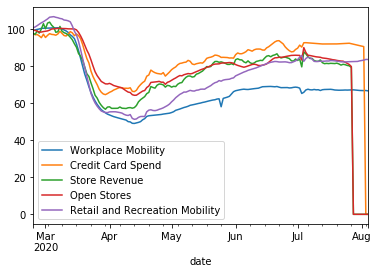

In [30]:
df6= df5[["Workplace Mobility","Credit Card Spend","Store Revenue","Open Stores","Retail and Recreation Mobility"]].copy()
df6.plot()

# Regional Weight

In [31]:
#set to only get unique values
S_east = df4['Region'] == "Southeast"
F_west = df4['Region'] == "Far West"
S_west = df4['Region'] == "Southwest"
M_east = df4['Region'] == "Mideast"
G_Lakes = df4['Region'] == "Great Lakes"
Plains = df4['Region'] == "Plains"
N_Eng = df4['Region'] == "New England"
R_Mountain = df4['Region'] == "Rocky Mountain"

In [32]:
def regionalise(df,region):
    #dataframe for region
    df1= df[region]
    #convert the date to datetime
    df1["Date"] = pd.to_datetime(df1["date"],format = "%d-%m-%Y")
    df1=df1.set_index("Date")
    
    #work out sum of gdp contribution for regions
    df2 = pd.DataFrame(df1.groupby('date', as_index=False)['GDP_Contribution'].sum())
    #convert date to datetime
    df2['Date'] =  pd.to_datetime(df2['date'], format='%d-%m-%Y')
    df2 = df2.set_index('Date')
    
    #merge data
    df2 = df2.merge(df1, left_index=True, right_index=True)
    
    #calculate the weight for each state
    df2["regional_weight"] = df2['GDP_Contribution_y']/df2['GDP_Contribution_x']
    
    
    #use the above to create the regional input for each state
    df2["Workplace Mobility"]= df2["gps_workplaces"]*df2["regional_weight"]
    df2["regionally_weighted_spend_all"]= df2["spend_all"]*df2["regional_weight"]
    df2["regionally_weighted_revenue_all"]= df2["revenue_all"]*df2["regional_weight"]
    df2["regionally_weighted_merchants_all"]= df2["merchants_all"]*df2["regional_weight"]
    df2["Retail & Recreation"]= df2["retail_rec"]*df2["regional_weight"]
    
    #sum weighted components
    df3 = pd.DataFrame(df2.groupby('Date')['Workplace Mobility'].sum())
    df3["Credit Card Spend"] = pd.DataFrame(df2.groupby('Date')['regionally_weighted_spend_all'].sum())
    df3["Small Business Revenue"] = pd.DataFrame(df2.groupby('Date')['regionally_weighted_revenue_all'].sum())
    df3["Open Stores"] = pd.DataFrame(df2.groupby('Date')['regionally_weighted_merchants_all'].sum())
    df3["Retail & Recreation"] = pd.DataFrame(df2.groupby('Date')['Retail & Recreation'].sum())

    return df3



In [33]:
S_east = df4['Region'] == "Southeast"
F_west = df4['Region'] == "Far West"
S_west = df4['Region'] == "Southwest"
M_east = df4['Region'] == "Mideast"
G_Lakes = df4['Region'] == "Great Lakes"
Plains = df4['Region'] == "Plains"
N_Eng = df4['Region'] == "New England"
R_Mountain = df4['Region'] == "Rocky Mountain"

In [34]:
S_east = regionalise(df4,S_east)
S_east = S_east.add_prefix('South East ')

F_west = regionalise(df4,F_west)
F_west = F_west.add_prefix('Far West ')

S_west = regionalise(df4,S_west)
S_west = S_west.add_prefix('South West ')

M_east = regionalise(df4,M_east)
M_east = M_east.add_prefix('Mid-East ')

G_Lakes = regionalise(df4,G_Lakes)
G_Lakes = G_Lakes.add_prefix('Great Lakes ')

Plains = regionalise(df4,Plains)
Plains = Plains.add_prefix('Plains ')

N_Eng = regionalise(df4,N_Eng)
N_Eng = N_Eng.add_prefix('New England ')

R_Mountain = regionalise(df4,R_Mountain)
R_Mountain = R_Mountain.add_prefix('Rocky Mountains ')

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [35]:
df_Master = S_east.merge(df6, left_index=True, right_index=True)
df_Master = F_west.merge(df_Master, left_index=True, right_index=True)
df_Master = S_west.merge(df_Master, left_index=True, right_index=True)
df_Master = M_east.merge(df_Master, left_index=True, right_index=True)
df_Master = G_Lakes.merge(df_Master, left_index=True, right_index=True)
df_Master = Plains.merge(df_Master, left_index=True, right_index=True)
df_Master = N_Eng.merge(df_Master, left_index=True, right_index=True)
df_Master = R_Mountain.merge(df_Master, left_index=True, right_index=True)

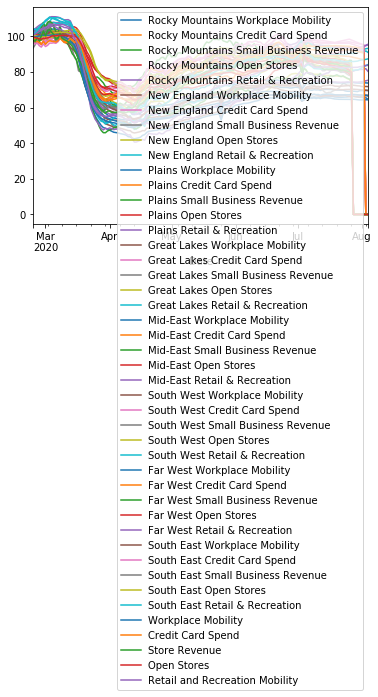

In [36]:
df_Master.plot()

In [37]:
df_done = df_Master.copy()
import numpy as np
df_done[df_done.eq(0)] = np.nan

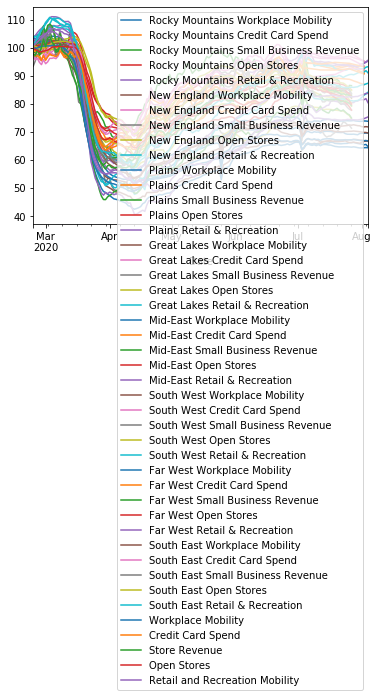

In [38]:
df_done.plot()

In [39]:
df_done.to_csv("covid_data.csv")

In [40]:
global_mobility = pd.read_csv("https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv")


C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [41]:
global_mobility.tail()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1800199,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-08-05,NaN,NaN,NaN,NaN,-5.0,NaN
1800200,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-08-06,NaN,NaN,NaN,NaN,-11.0,NaN
1800201,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-08-07,NaN,NaN,NaN,NaN,-1.0,NaN
1800202,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-08-10,NaN,NaN,NaN,NaN,-49.0,NaN
1800203,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-08-11,NaN,NaN,NaN,NaN,-44.0,NaN


In [42]:
UK = global_mobility.loc[global_mobility['country_region'].isin(["United Kingdom"])]

In [43]:
UK.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
690504,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,2020-02-15,-12.0,-7.0,-35.0,-12.0,-4.0,2.0
690505,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,2020-02-16,-7.0,-6.0,-28.0,-7.0,-3.0,1.0
690506,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,2020-02-17,10.0,1.0,24.0,-2.0,-14.0,2.0
690507,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,2020-02-18,7.0,-1.0,20.0,-3.0,-14.0,2.0
690508,GB,United Kingdom,NaN,NaN,NaN,NaN,NaN,2020-02-19,6.0,-2.0,8.0,-4.0,-14.0,3.0


In [44]:
ben_mobility = global_mobility.loc[global_mobility['country_region'].isin(['United States','United Kingdom',"Italy", "Germany", "France", "Spain", "Russia", "South Korea", "Japan", "Vietnam","Brazil", "Mexico","Taiwan","Mexico"])]

In [45]:
ben_mobility = ben_mobility.loc[ben_mobility['sub_region_1'].isnull()]
ben_mobility = ben_mobility.loc[ben_mobility['sub_region_2'].isnull()]
ben_mobility = ben_mobility.loc[ben_mobility['census_fips_code'].isnull()]
ben_mobility = ben_mobility.loc[ben_mobility['metro_area'].isnull()]

In [46]:
ben_mobility

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
176757,BR,Brazil,NaN,NaN,NaN,NaN,NaN,2020-02-15,5.0,4.0,-5.0,8.0,6.0,0.0
176758,BR,Brazil,NaN,NaN,NaN,NaN,NaN,2020-02-16,2.0,3.0,-13.0,3.0,0.0,1.0
176759,BR,Brazil,NaN,NaN,NaN,NaN,NaN,2020-02-17,-2.0,0.0,-12.0,9.0,19.0,-1.0
176760,BR,Brazil,NaN,NaN,NaN,NaN,NaN,2020-02-18,-3.0,-1.0,-11.0,9.0,15.0,-1.0
176761,BR,Brazil,NaN,NaN,NaN,NaN,NaN,2020-02-19,-1.0,-2.0,-5.0,8.0,14.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1783332,VN,Vietnam,NaN,NaN,NaN,NaN,NaN,2020-08-07,-17.0,0.0,-21.0,-22.0,-9.0,8.0
1783333,VN,Vietnam,NaN,NaN,NaN,NaN,NaN,2020-08-08,-20.0,2.0,-25.0,-21.0,-8.0,10.0
1783334,VN,Vietnam,NaN,NaN,NaN,NaN,NaN,2020-08-09,-21.0,0.0,-21.0,-25.0,-9.0,9.0
1783335,VN,Vietnam,NaN,NaN,NaN,NaN,NaN,2020-08-10,-15.0,6.0,-14.0,-20.0,1.0,7.0


In [47]:
ben_mobility.to_csv("mobility_data.csv")